<a href="https://colab.research.google.com/github/shreyas1209/Emotion-Detection/blob/main/Emotion_main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#testing data preprocessing
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import PIL
import os
import matplotlib.pyplot as plt
import matplotlib.image as img
from torchvision import datasets
from torchvision import transforms
from PIL import Image, ImageDraw
from torch.utils.data import Dataset, DataLoader
from numpy import genfromtxt
import torchvision.utils as vutils
import cv2

In [2]:

#mounting google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu") 

Using pandas to see how the train and validation data is stored in the csv file


In [4]:
train_data = pd.read_csv('/content/gdrive/MyDrive/face_images/emotion_detection/train.csv')
train_data.head(10)

,emotion,pixels
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...
5,2,55 55 55 55 55 54 60 68 54 85 151 163 170 179 ...
6,4,20 17 19 21 25 38 42 42 46 54 56 62 63 66 82 1...
7,3,77 78 79 79 78 75 60 55 47 48 58 73 77 79 57 5...
8,3,85 84 90 121 101 102 133 153 153 169 177 189 1...
9,2,255 254 255 254 254 179 122 107 95 124 149 150...


In [5]:
test_data = pd.read_csv('/content/gdrive/MyDrive/face_images/emotion_detection/test.csv')
test_data.head()

,pixels
0,254 254 254 254 254 249 255 160 2 58 53 70 77 ...
1,156 184 198 202 204 207 210 212 213 214 215 21...
2,69 118 61 60 96 121 103 87 103 88 70 90 115 12...
3,205 203 236 157 83 158 120 116 94 86 155 180 2...
4,87 79 74 66 74 96 77 80 80 84 83 89 102 91 84 ...


In [6]:
train_data.shape


(28709, 2)

In [7]:
test_data.shape

(7178, 1)

Creating a class called dataset combining the pixel values of the images and their respective classes 

The dataset class takes in the input of the csv file path and transform and the type of data ( by default it considers it as train data)

It contains two methods :

__
len__
() gives the length of the dataset, i.e the number of  data points in  the dataset

__
getitem
__(index) takes the index of the data point as input and gives the output as :

(image tensor,label)

In [28]:
class dataset(torch.utils.data.Dataset):
  def __init__(self,csv_path,transform = None,dataType = 'train'):
    self.df = pd.read_csv(csv_path)
    self.transform = transform
    self.dataType = dataType

  def __len__(self):
    return len(self.df)
  
  def __getitem__(self,index):
    if self.dataType == 'train':
      data = self.df['pixels'][index]
      label = self.df['emotion'][index]
      data = data.split()
      data = [int(i) for i in data]
      data = torch.tensor(data)
      data = data.reshape(48,48)

      return data,label

    elif self.dataType == 'test':
      data = self.df['pixels'][index]
      data = data.split()
      data = [int(i) for i in data]
      data = torch.tensor(data)
      data = data.reshape(48,48)
      return data



    
    


In [29]:
train_data = dataset(csv_path = '/content/gdrive/MyDrive/face_images/emotion_detection/train.csv' , dataType = 'train')
test_data = dataset (csv_path = '/content/gdrive/MyDrive/face_images/emotion_detection/test.csv' , dataType = 'test')

In [30]:
print(train_data[13])
print(test_data[11])


(tensor([[148, 144, 130,  ..., 193, 224, 247],
        [149, 140, 134,  ..., 198, 224, 247],
        [138, 132, 124,  ..., 196, 226, 250],
        ...,
        [101, 130, 183,  ..., 113, 113, 112],
        [ 76, 120, 183,  ..., 113, 112, 113],
        [ 46, 116, 186,  ..., 112, 111, 111]]), 6)
tensor([[ 88,  46,  35,  ..., 182, 180, 214],
        [ 68,  34,  31,  ..., 195, 183, 208],
        [ 51,  34,  35,  ..., 184, 166, 196],
        ...,
        [106,  94,  70,  ..., 228, 227, 227],
        [ 99,  89,  61,  ..., 226, 227, 228],
        [ 88,  78,  54,  ..., 229, 228, 227]])


3


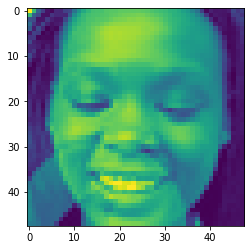

In [32]:
plt.imshow(train_data[19011][0])
print(train_data[19011][1])

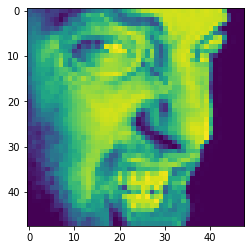

In [36]:
plt.imshow(test_data[111])

    
    

    

In [12]:
train_dataloader = DataLoader()